# data exploration


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
np.random.seed(123)

# Load Data

In [33]:
data = pd.read_csv(r'./data/data.csv')
#data.columns = ['index', 'yearsInBusiness', 'rAssets', 'rIntang', 'rNOI', 'rating010', 'NACE_division', 'staff_count', 'staff_turnover', 'staff_variation','lat', 'lon']
data.head(3)

,id,lon,lat,yearsInBusiness,NACE_division,totEquity,totAssets,noi,revenues,profLoss,...,debts,deprec,totIntang,rAssets,rNOI,rIntang,rating010,staff_count,staff_turnover,staff_variation
0,0,13.761632,45.645705,53.0,52,785406.0,2444684.0,788007.0,3166261.0,761405.0,...,1400533.0,18574.0,2515.0,3.112637,1.003312,0.003202,9.0,16.0,3,1
1,1,13.761632,45.645705,53.0,52,785406.0,2444684.0,788007.0,3166261.0,761405.0,...,1400533.0,18574.0,2515.0,3.112637,1.003312,0.003202,9.0,16.0,4,0
2,2,13.494513,45.890163,58.5,47,3624935.0,5005047.0,717498.0,7013487.0,545112.0,...,862050.0,91440.0,93363.0,1.380727,0.197934,0.025756,9.0,29.0,13,1


# Data Exploration

In [34]:
data_desc = data.describe()
data_desc

,id,lon,lat,yearsInBusiness,NACE_division,totEquity,totAssets,noi,revenues,profLoss,...,debts,deprec,totIntang,rAssets,rNOI,rIntang,rating010,staff_count,staff_turnover,staff_variation
count,11278.000000,11278.000000,11278.000000,11278.000000,11278.000000,1.127800e+04,1.127800e+04,1.127800e+04,1.127800e+04,1.127800e+04,...,1.127800e+04,1.127800e+04,1.127800e+04,1.127800e+04,1.127800e+04,1.127800e+04,11278.000000,11278.000000,11278.000000,11278.000000
mean,5638.500000,13.172583,45.944201,22.412777,47.741710,3.323100e+06,8.740546e+06,3.850058e+05,5.898749e+06,2.592852e+05,...,3.693817e+06,3.122691e+05,5.838982e+05,inf,-inf,inf,6.063575,21.863540,8.852988,0.368328
std,3255.822502,0.393347,0.187140,15.422716,20.322706,3.862974e+07,1.311247e+08,6.941347e+06,4.960441e+07,4.234447e+06,...,7.881237e+07,3.547082e+06,1.404394e+07,NaN,NaN,NaN,1.700910,103.933789,37.440612,4.988485
min,0.000000,12.331641,45.586202,0.800000,1.000000,-2.297749e+07,-4.323000e+03,-3.561701e+07,-3.000000e+00,-4.499855e+07,...,-4.017200e+04,-2.399300e+04,-9.001000e+03,-1.754748e+03,-inf,-1.187091e+02,0.000000,0.000000,0.000000,-48.000000
25%,2819.250000,12.826040,45.826110,9.900000,31.000000,4.869150e+04,2.804252e+05,3.752000e+03,1.758578e+05,2.132500e+02,...,8.808875e+04,4.771250e+03,0.000000e+00,1.756054e+00,3.469116e-02,0.000000e+00,5.000000,1.000000,0.000000,0.000000
50%,5638.500000,13.222327,45.957822,19.400000,46.000000,2.056635e+05,8.537460e+05,2.769600e+04,6.627885e+05,1.194150e+04,...,2.903165e+05,2.054000e+04,2.596500e+03,3.069007e+00,1.657233e-01,7.442427e-03,6.000000,6.000000,2.000000,0.000000
75%,8457.750000,13.443402,46.062487,31.900000,64.000000,8.736510e+05,2.762645e+06,1.140268e+05,2.240834e+06,6.949525e+04,...,9.996842e+05,7.643975e+04,2.948600e+04,6.434973e+00,4.111435e-01,9.075414e-02,8.000000,16.000000,6.000000,1.000000
max,11277.000000,13.863699,46.603854,109.200000,96.000000,1.629648e+09,6.604382e+09,3.467160e+08,1.979299e+09,1.538490e+08,...,4.111092e+09,1.493900e+08,6.608760e+08,inf,2.146667e+02,inf,10.000000,3775.000000,1799.000000,272.000000


In [35]:
# extract min and max from df.describe()
lon_min, lon_max = data_desc.lon[3], data_desc.lon[7]
lat_min, lat_max = data_desc.lat[3], data_desc.lat[7]


In [36]:
def plot_clusters(X, cluster_labels, title=""):
    for i in np.unique(cluster_labels):
        cluster_points = X[cluster_labels == i , :]       
        if i == 0: 
            ax.scatter(cluster_points[:,0] , cluster_points[:,1] , color="yellow", marker='.', s=2)
        else:
            ax.scatter(cluster_points[:,0] , cluster_points[:,1] , cmap = i, marker='o', s=2)
    ax.set_title(title, fontweight='bold')
    return

X = np.array(data[ ['lon','lat'  ] ]) 
n, p  = X.shape
_, ax = plt.subplots(figsize=(8,8))
plot_clusters(X, np.ones(n), title = "dataset")
plt.show()


## Scaling factor

In [37]:
# approximated, valid only at short distances but good enough to give a rougn idea of epsilon
R = 6371 #earth radius
lon1, lat1,  =  12.6, 46.0
lon2, lat2   =  13.8, 46.0
# longitude x
dx = R*(lon2-lon1)*np.cos(lat1)*np.pi/180
# latitude y
dy = R* (lat2-lat1)*np.pi/180
d =  np.sqrt(dx**2 +  dy**2)
dx, dy

(-57.66719385463093, 0.0)

In [38]:
lon1, lat1,  =  13.2, 45.6
lon2, lat2   =  13.2, 46.6
# longitude x
dx = R*(lon2-lon1)*np.cos(lat1)*np.pi/180
# latitude y
dy = R* (lat2-lat1)*np.pi/180
d =  np.sqrt(dx**2 +  dy**2)
dx, dy

(-0.0, 111.19492664455873)

In [39]:
# TODO add scaling factor 57,111 to have more "readable" values of epsilon in km

## calculate density for each point
X = data points = company position
G = grid points equally spaced

In [43]:
data

,id,lon,lat,yearsInBusiness,NACE_division,totEquity,totAssets,noi,revenues,profLoss,...,debts,deprec,totIntang,rAssets,rNOI,rIntang,rating010,staff_count,staff_turnover,staff_variation
0,0,13.761632,45.645705,53.0,52,785406.0,2444684.0,788007.0,3166261.0,761405.0,...,1400533.0,18574.0,2515.0,3.112637,1.003312,0.003202,9.0,16.0,3,1
1,1,13.761632,45.645705,53.0,52,785406.0,2444684.0,788007.0,3166261.0,761405.0,...,1400533.0,18574.0,2515.0,3.112637,1.003312,0.003202,9.0,16.0,4,0
2,2,13.494513,45.890163,58.5,47,3624935.0,5005047.0,717498.0,7013487.0,545112.0,...,862050.0,91440.0,93363.0,1.380727,0.197934,0.025756,9.0,29.0,13,1
3,3,13.494513,45.890163,58.5,47,3624935.0,5005047.0,717498.0,7013487.0,545112.0,...,862050.0,91440.0,93363.0,1.380727,0.197934,0.025756,9.0,29.0,11,1
4,4,13.272456,45.999475,51.1,68,4138797.0,5497166.0,8869.0,629928.0,23037.0,...,1094800.0,204422.0,12857.0,1.328204,0.002143,0.003106,6.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11273,11273,13.229482,46.056279,59.0,38,20491838.0,36775434.0,1350453.0,33011544.0,1266904.0,...,11570634.0,1661344.0,826693.0,1.794638,0.065902,0.040343,7.0,89.0,2,0
11274,11274,13.229482,46.056279,59.0,38,20491838.0,36775434.0,1350453.0,33011544.0,1266904.0,...,11570634.0,1661344.0,826693.0,1.794638,0.065902,0.040343,7.0,89.0,23,-17
11275,11275,13.323596,45.974651,21.6,41,124186.0,305150.0,-19071.0,333157.0,-19653.0,...,80742.0,927.0,0.0,2.457201,-0.153568,0.000000,5.0,5.0,1,-1
11276,11276,13.220802,46.214138,8.3,68,3378.0,422729.0,-4011.0,0.0,-3080.0,...,210140.0,0.0,993.0,125.141800,-1.187389,0.293961,2.0,0.0,0,0


In [56]:
X = np.array( (data.lon, data.lat, data.yearsInBusiness) ).T
X.shape

(11278, 3)

In [57]:

grid = pd.read_csv(r'./maps/FVG/FVG_grid.csv')
nbins=np.sqrt(grid.shape[0]).astype(int)
xi = np.array(grid.x).reshape(nbins,nbins)
yi = np.array(grid.y).reshape(nbins,nbins)
G =  np.array(grid)

# calculate distance matrix

In [59]:
dm = distance_matrix(G,X[:,:2])
n_data_points= X.shape[0]
n_grid_points=G.shape[0]
n_reshape = np.sqrt(n_grid_points).astype(int)


In [60]:
def epsilon_neighborhood(dm, X, g, epsilon):
    """
    dm: distance_matrix(G,X)
    g: point of the grid G
    returns eps_neighb a list of indices of X that are within a distance epsilon of point G
    """
    distances = dm[g]
    eps_neighb = np.where(X[ (distances < epsilon) ])[0]
    number_of_neighb = len(eps_neighb)
    
    return number_of_neighb, eps_neighb


Given Epsilon = 0.005 and minPoints = 20, the fraction of core points is 0.0194
Given Epsilon = 0.01 and minPoints = 20, the fraction of core points is 0.0648
Given Epsilon = 0.02 and minPoints = 20, the fraction of core points is 0.1775
Given Epsilon = 0.05 and minPoints = 20, the fraction of core points is 0.4052
Given Epsilon = 0.08 and minPoints = 20, the fraction of core points is 0.5577


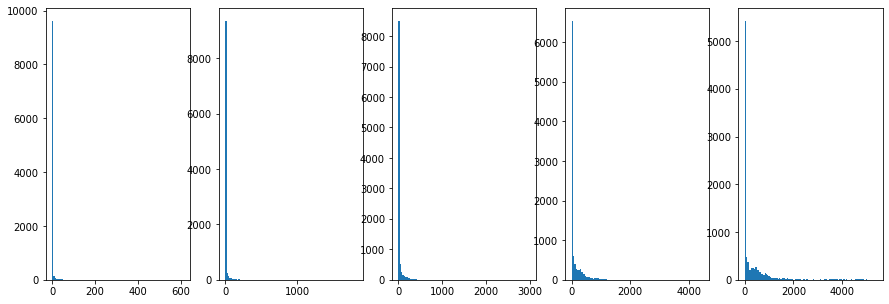

In [61]:
minPoints = 20
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (15,5))
nplot=0
for epsilon in [5e-3, 1e-2, 2e-2, 5e-2, 8e-2]:
    nn_epsilon = []
    is_core = []
    for g in range(n_grid_points):
        number_of_neighb, eps_neighb = epsilon_neighborhood(dm, X, g, epsilon)
        nn_epsilon.append(number_of_neighb)
        is_core.append( number_of_neighb > minPoints  )
    
    ax[nplot].hist(nn_epsilon, bins = 100)
    nplot+=1
    fraction_core_points = np.array(is_core).mean()
    print(f'Given Epsilon = {epsilon} and minPoints = {minPoints}, the fraction of core points is {fraction_core_points}')

select epsilon = .05, minPoints=20

# compute density

In [62]:
def compute_density(dm, X, G, epsilon):
    n_grid_points=  G.shape[0]
    n_data_points = X.shape[0]
    assert n_data_points > 0 , "size of X should be greater than 0"
    density = np.zeros(n_grid_points).astype(int)
    number_of_neighb = np.zeros(n_grid_points).astype(int)

    for g in range(n_grid_points):
        nnb, eps_neighb = epsilon_neighborhood(dm, X, g, epsilon)
        number_of_neighb[g] = nnb
    
    density = number_of_neighb/n_data_points
    
        
    return np.array(number_of_neighb), np.array(density)

In [63]:
def compute_weighted_density(dm, X, G, W, epsilon):
    n_grid_points=  G.shape[0]
    n_data_points = X.shape[0]
    assert n_data_points > 0 , "size of X should be greater than 0"
    sum_of_weights = np.zeros(n_grid_points).astype(int)
    number_of_neighb = np.zeros(n_grid_points).astype(int)

    for g in range(n_grid_points):
        nnb, eps_neighb = epsilon_neighborhood(dm, X, g, epsilon)
        number_of_neighb[g] = nnb 
        sum_of_weights[g] = np.sum(W[eps_neighb])
    
    density = sum_of_weights/n_data_points
    
        
    return np.array(number_of_neighb), np.array(density)

In [64]:
epsilon=1e-2
nn, dG1 = compute_density(dm, X, G,  epsilon=epsilon)


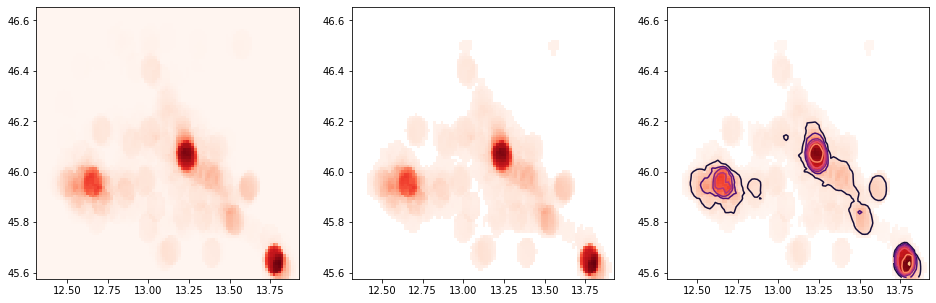

In [65]:

fig, (ax1,ax2, ax3) = plt.subplots(figsize=(16,5), nrows=1, ncols=3)
nn, dG1 = compute_density(dm, X, G, epsilon=0.06)

cmap="Reds"
n_reshape = 100
dG1r = dG1.reshape((n_reshape,n_reshape))

ax1.pcolormesh(xi, yi, dG1r,shading='nearest', cmap=cmap)

threshold=epsilon
dG1rM = np.ma.masked_array(dG1r, dG1r <threshold)
ax2.pcolormesh(xi, yi, dG1rM, shading='auto', cmap=cmap, vmin=0)

ax3.pcolormesh(xi, yi, dG1rM, shading='auto', cmap=cmap, alpha = 1, zorder = 1)
ax3.contour(xi, yi, dG1rM, cmap="magma", vmin=threshold, zorder = 3)

plt.show()


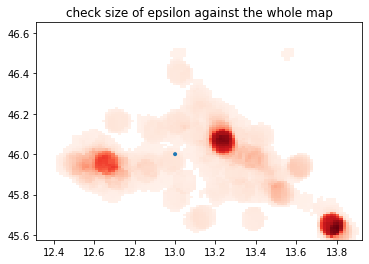

In [66]:
figure, axes = plt.subplots() 
cc = plt.Circle( (13,46), epsilon)
plt.pcolormesh(xi, yi, dG1rM, shading='auto', cmap=cmap, vmin=0)

axes.set_aspect( 1 ) 
axes.add_artist( cc ) 
plt.title( 'check size of epsilon against the whole map' ) 
plt.show()

In [67]:
def plot_map(df, color_fill = "green", alpha = .2, color_border= "gray" , linewidth = .8):
    for _, row in df.iterrows():
        x, y = list(zip(*row.poly)) 
        plt.fill(x,y, color = color_fill, alpha = alpha, zorder=1)
        plt.plot(x,y, color = color_border, linewidth=linewidth, zorder=2)
        


In [68]:
#load data from file
ita = pd.read_json(r'./maps/FVG/FVG_mappa.json', orient='records')
# filter a single region
fvg=ita[ ita.istat_r==6]
# plot the map


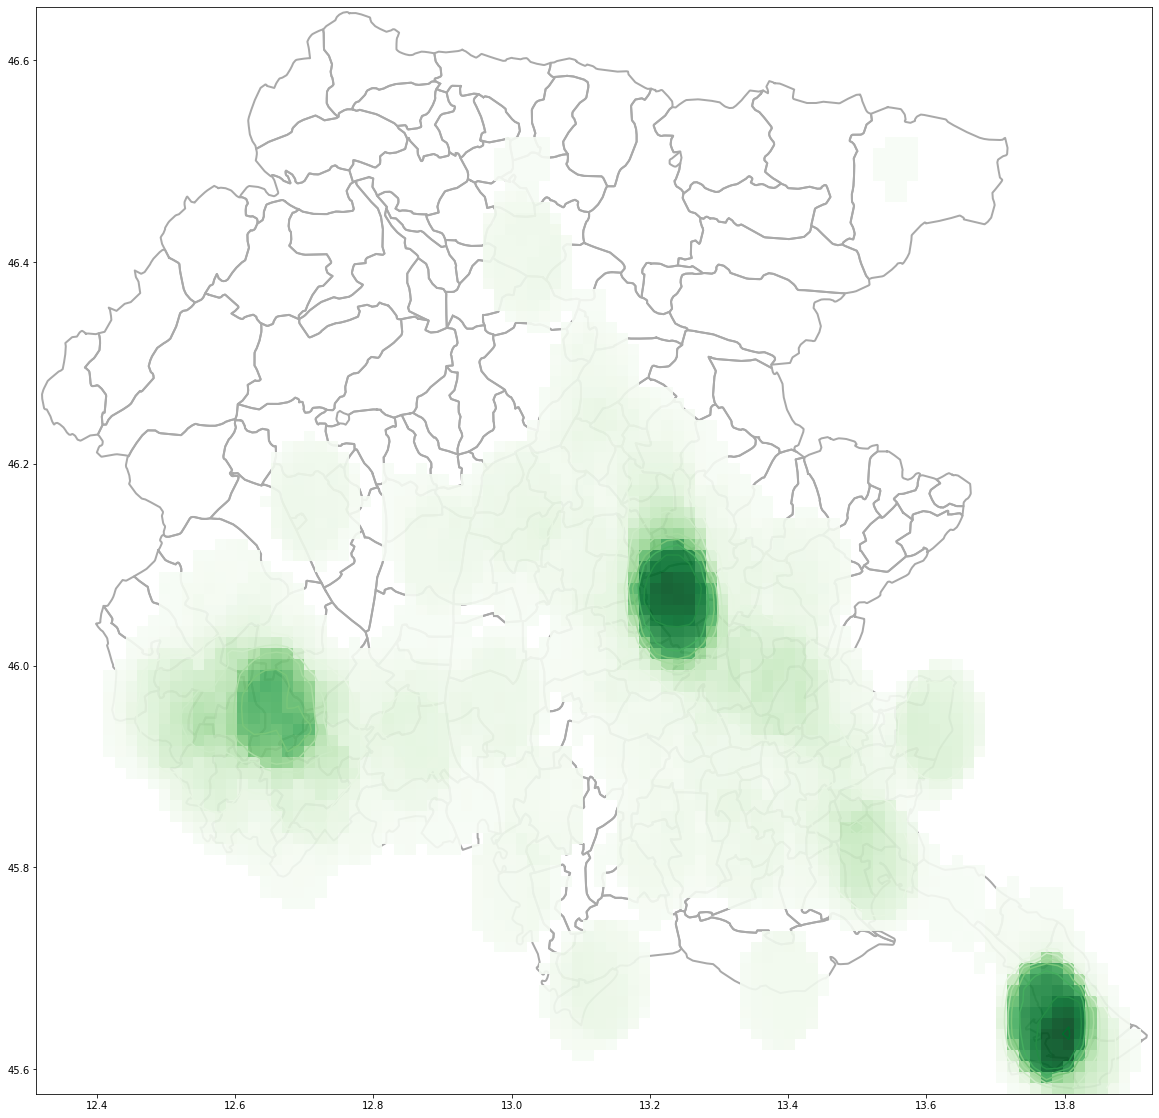

In [69]:
fig, ax = plt.subplots(figsize=(20,20))

plot_map(fvg, color_fill = "white", alpha = 1, color_border= "darkgray" , linewidth = 2)
plt.pcolormesh(xi, yi, dG1rM, shading='auto', cmap="Greens",alpha = .9, zorder = 3)
plt.contour(xi, yi, dG1rM, cmap="Greens", vmin=threshold, zorder = 4)
plt.show()

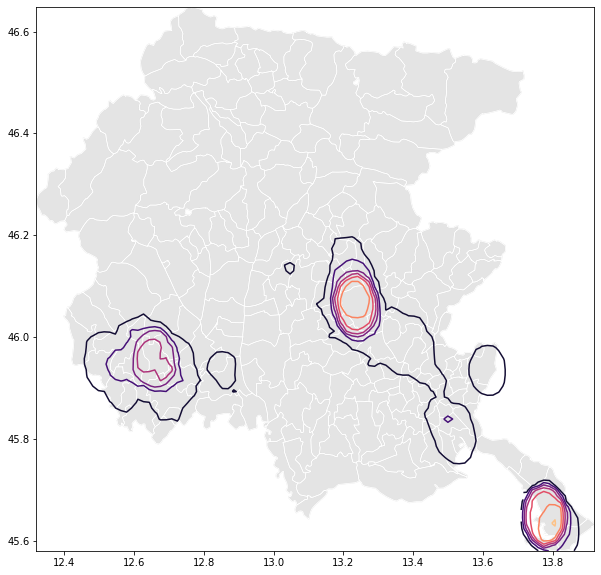

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plot_map(fvg, color_fill = "lightgray", alpha = .6, color_border= "white" , linewidth = .8)
plt.contour(xi, yi, dG1rM, cmap="magma", vmin=threshold, zorder = 4)

plt.show()

## other data points

In [ ]:
data.columns

Index(['id', 'lon', 'lat', 'yearsInBusiness', 'NACE_division', 'totEquity',
       'totAssets', 'noi', 'revenues', 'profLoss', 'valAdded', 'personnel',
       'debts', 'deprec', 'totIntang', 'rAssets', 'rNOI', 'rIntang',
       'rating010', 'staff_count', 'staff_turnover', 'staff_variation'],
      dtype='object')

In [103]:
dd = data[ ['lon', 'lat', 'staff_turnover'] ]
dd.columns = ['x','y','z']
D = np.array(dd[ ['x','y' ] ]) 
D.shape

(11278, 2)

## a simple bubble plot


In [104]:
dd.z.describe()

count    11278.000000
mean         8.852988
std         37.440612
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max       1799.000000
Name: z, dtype: float64

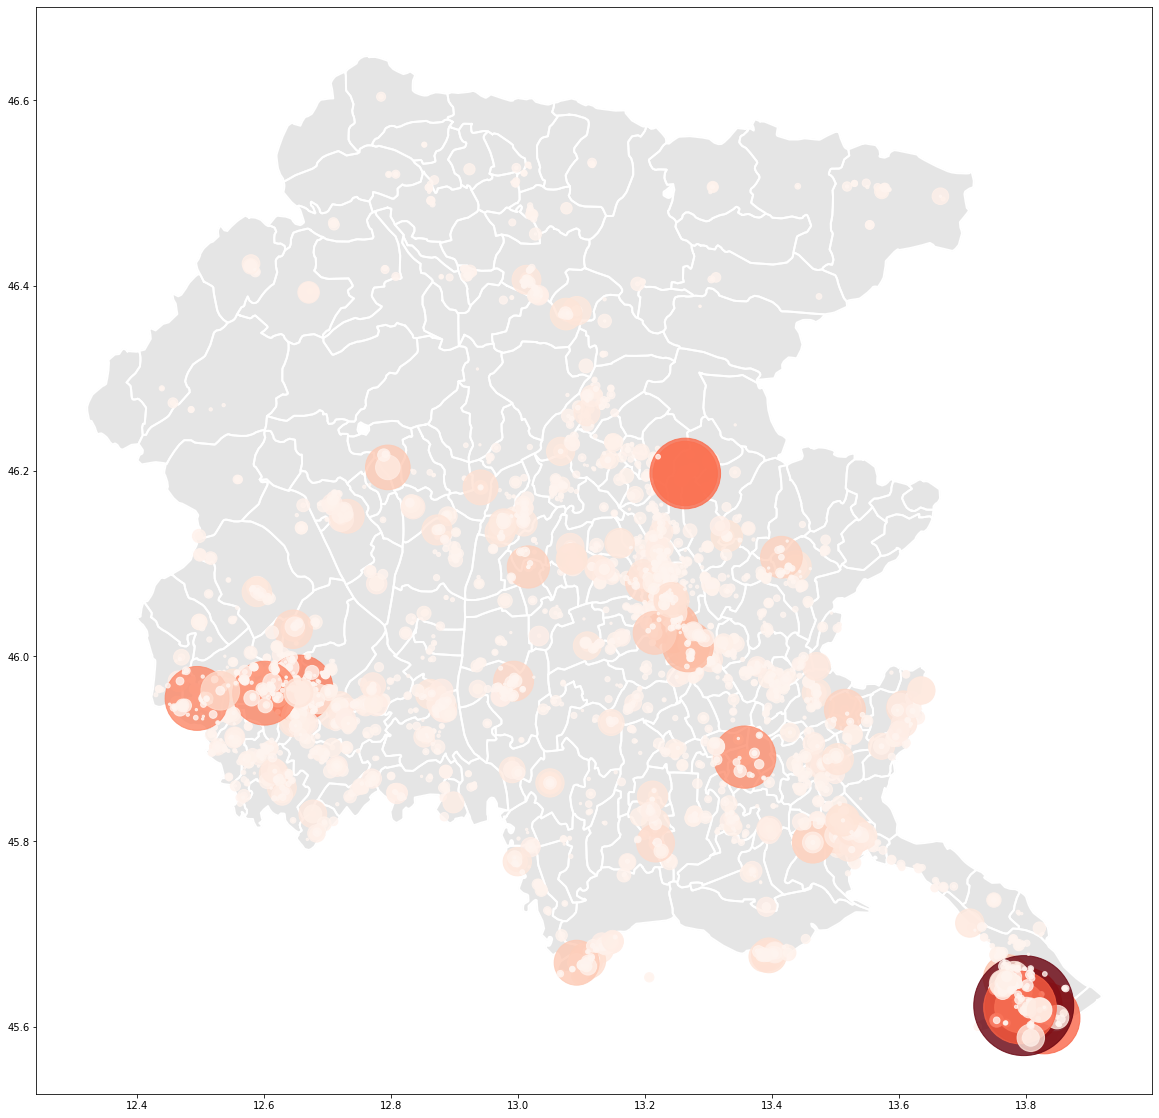

In [116]:
fig, ax = plt.subplots(figsize=(20,20))
plot_map(fvg, color_fill = "gray", alpha = .2, color_border= "white" , linewidth = 2)
zzz = dd.z/np.max(dd.z)
plt.scatter(dd.x,dd.y, s=zzz*10000, c = zzz, alpha = .8, cmap = "Reds", zorder = 5)

## density

In [117]:
dm = distance_matrix(G,D)
n_data_points= D.shape[0]
n_grid_points= G.shape[0]
n_reshape = np.sqrt(n_grid_points).astype(int)

In [118]:
epsilon=2e-2
W = np.array(dd.z)
nn, dens = compute_weighted_density(dm, X, G, W, epsilon=epsilon)
dens_r = dens.reshape((n_reshape,n_reshape))
 


In [119]:
dens.mean()

0.01905707572264586

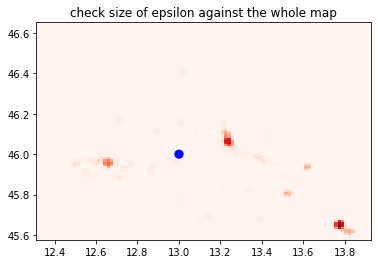

In [120]:
figure, axes = plt.subplots() 
plt.pcolormesh(xi, yi, dens_r, shading='auto', cmap='Reds', vmin=epsilon)
cc = plt.Circle( (13,46), epsilon,color = "blue")
axes.add_artist( cc ) 
plt.title( 'check size of epsilon against the whole map' ) 
plt.show()

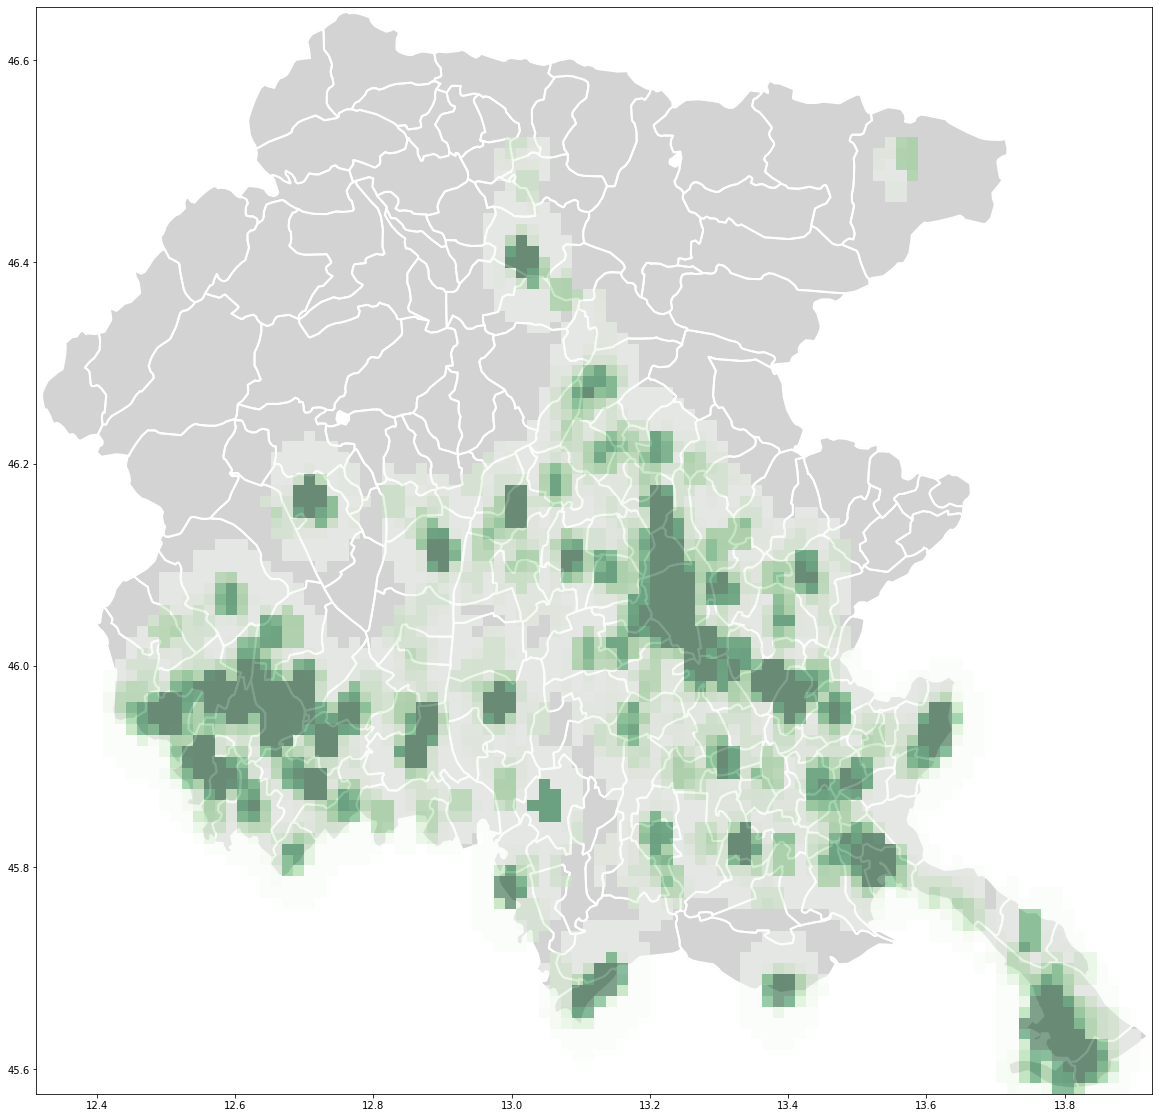

In [141]:
fig, ax = plt.subplots(figsize=(20,20))
cmap = "Greens"
plot_map(fvg, color_fill = "lightgray", alpha = 1, color_border= "white" , linewidth = 2)

threshold=epsilon/2
dens_r_M = np.ma.masked_array(dens_r, dG1r <threshold)
plt.pcolormesh(xi, yi, dens_r_M, shading='auto', cmap='Greens', alpha = .5, zorder = 4, 
               vmin= epsilon/10, vmax=epsilon*5)

#plt.contour(xi, yi, dens_r_M, cmap="autumn",  zorder = 5)

plt.show()